# Classification - Etape 1 - Définition générale du climat selon classification Koppen

# 1. Import des package

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import time 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import geopandas as gpd
from shapely.geometry import Point

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from  scipy.spatial.distance import cdist

from sklearn.cluster import KMeans 
from sklearn.cluster import AgglomerativeClustering  

from sklearn.metrics import make_scorer, classification_report, recall_score, f1_score, precision_recall_fscore_support, precision_recall_curve, roc_curve,auc, precision_score

from scipy.cluster.hierarchy import dendrogram,linkage

from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, StratifiedKFold, KFold
# from imblearn.under_sampling import RandomUnderSampler

# import lightgbm as lgb


# 2. Import des fichiers de travail

**Chargements des jeux de données :**
 - df : données météo en australie sur 10 ans avec les NA retraités 

In [2]:
df = pd.read_csv("weatherAUS_Rev3.csv")


In [3]:
pd.set_option('display.max_columns',None)
df_test = pd.read_csv("weatherAUS_Rev1.csv")
df_test.head()

,Unnamed: 0,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Num,RainTomorrow_Num,Mois,Trimestre,Annee,WindGust_Ang,Wind9am_Ang,Wind3pm_Ang,Date,Location,Latitude,Longitude,Climat_Koppen,Clim_type,WindGust_cos,Wind9am_cos,Wind3pm_cos,WindGust_sin,Wind9am_sin,Wind3pm_sin,Rain_J-1,Rain_J-2,Rain_J+2,Rain_J+3
0,93858,6.2,15.1,0.0,1.80,2.1,20.0,2.0,11.0,81.0,56.0,1027.8,1026.5,4,5,9.3,13.9,0,0,7,3,2008,180.0,67.5,225.0,2008-07-03,Adelaide,-34.916897,138.598531,Csa,méditerranéen,-1.000000,0.382683,-0.707107,1.224647e-16,0.923880,-0.707107,0.0,1.0,0.0,1.0
1,93859,5.3,15.9,0.0,1.40,8.0,30.0,6.0,13.0,71.0,46.0,1028.7,1025.6,3,3,10.2,15.3,0,0,7,3,2008,67.5,67.5,45.0,2008-07-04,Adelaide,-34.916897,138.598531,Csa,méditerranéen,0.382683,0.382683,0.707107,9.238795e-01,0.923880,0.707107,0.0,0.0,1.0,1.0
2,93860,11.3,15.7,8.1,3.52,1.5,52.0,15.0,22.0,62.0,62.0,1019.5,1016.2,5,6,13.0,14.4,0,1,7,3,2008,112.5,67.5,112.5,2008-07-06,Adelaide,-34.916897,138.598531,Csa,méditerranéen,-0.382683,0.382683,-0.382683,9.238795e-01,0.923880,0.923880,0.0,0.0,1.0,1.0
3,93861,7.6,11.2,16.2,4.60,1.1,46.0,17.0,13.0,83.0,88.0,1015.9,1017.9,7,7,9.8,9.3,1,1,7,3,2008,202.5,157.5,225.0,2008-07-07,Adelaide,-34.916897,138.598531,Csa,méditerranéen,-0.923880,-0.923880,-0.707107,-3.826834e-01,0.382683,-0.707107,0.0,0.0,1.0,1.0
4,93862,5.3,13.5,17.0,0.60,2.1,43.0,11.0,22.0,73.0,91.0,1025.8,1025.9,6,7,10.9,10.8,1,1,7,3,2008,225.0,225.0,202.5,2008-07-08,Adelaide,-34.916897,138.598531,Csa,méditerranéen,-0.707107,-0.707107,-0.923880,-7.071068e-01,-0.707107,-0.382683,1.0,0.0,1.0,0.0


# 3. Decouverte du dataframe - Préprocessing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145455 entries, 0 to 145454
Data columns (total 47 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Unnamed: 0          145455 non-null  int64  
 1   MinTemp             145455 non-null  float64
 2   MaxTemp             145455 non-null  float64
 3   Rainfall            145455 non-null  float64
 4   Evaporation         145455 non-null  float64
 5   Sunshine            145455 non-null  float64
 6   WindGustSpeed       145455 non-null  float64
 7   WindSpeed9am        145455 non-null  float64
 8   WindSpeed3pm        145455 non-null  float64
 9   Humidity9am         145455 non-null  float64
 10  Humidity3pm         145455 non-null  float64
 11  Pressure9am         145455 non-null  float64
 12  Pressure3pm         145455 non-null  float64
 13  Cloud9am            145455 non-null  int64  
 14  Cloud3pm            145455 non-null  int64  
 15  Temp9am             145455 non-nul

In [5]:
df.head()

,Unnamed: 0,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Num,RainTomorrow_Num,Mois,Trimestre,Annee,Latitude,Longitude,WindGust_Ang,Wind9am_Ang,Wind3pm_Ang,WindGust_cos,Wind9am_cos,Wind3pm_cos,WindGust_sin,Wind9am_sin,Wind3pm_sin,Mois_sin,Mois_cos,clim_chaud_humide,clim_méditerranéen,clim_sec,clim_tempéré_froid,Rain_J-1,Rain_J-2,Rain_J+2,Rain_J+3,Date,Location,Climat_Koppen,Clim_type
0,2,6.2,15.1,0.0,1.80,2.1,20.0,2.0,11.0,81.0,56.0,1027.8,1026.5,5,4,9.3,13.9,0,0,7,3,2008,-34.916897,138.598531,180.0,67.5,225.0,-1.000000e+00,0.382683,-0.707107,1.224647e-16,0.923880,-0.707107,1.224647e-16,-1.0,0,1,0,0,0.0,1.0,0.0,0.0,2008-07-03,Adelaide,Csa,méditerranéen
1,3,5.3,15.9,0.0,1.40,8.0,30.0,6.0,13.0,71.0,46.0,1028.7,1025.6,4,6,10.2,15.3,0,0,7,3,2008,-34.916897,138.598531,67.5,67.5,45.0,3.826834e-01,0.382683,0.707107,9.238795e-01,0.923880,0.707107,1.224647e-16,-1.0,0,1,0,0,0.0,0.0,0.0,1.0,2008-07-04,Adelaide,Csa,méditerranéen
2,4,9.8,15.4,0.0,2.24,0.9,30.0,9.0,9.0,56.0,67.0,1023.6,1020.2,7,6,11.3,13.8,0,0,7,3,2008,-34.916897,138.598531,90.0,67.5,45.0,6.123234e-17,0.382683,0.707107,1.000000e+00,0.923880,0.707107,1.224647e-16,-1.0,0,1,0,0,0.0,0.0,1.0,1.0,2008-07-05,Adelaide,Csa,méditerranéen
3,5,11.3,15.7,8.1,3.32,1.5,52.0,15.0,22.0,62.0,62.0,1019.5,1016.2,5,5,13.0,14.4,0,1,7,3,2008,-34.916897,138.598531,112.5,67.5,112.5,-3.826834e-01,0.382683,-0.382683,9.238795e-01,0.923880,0.923880,1.224647e-16,-1.0,0,1,0,0,0.0,0.0,1.0,1.0,2008-07-06,Adelaide,Csa,méditerranéen
4,6,7.6,11.2,16.2,4.60,1.1,46.0,17.0,13.0,83.0,88.0,1015.9,1017.9,6,7,9.8,9.3,1,1,7,3,2008,-34.916897,138.598531,202.5,157.5,225.0,-9.238795e-01,-0.923880,-0.707107,-3.826834e-01,0.382683,-0.707107,1.224647e-16,-1.0,0,1,0,0,0.0,0.0,1.0,1.0,2008-07-07,Adelaide,Csa,méditerranéen


## Préparation des bases d'entrainement et de validation

In [6]:
clim_lettre1 = {'Am':'Tropical',
                'Aw':'Tropical',
                'Cfa':'Tempéré',
                'Cfb':'Tempéré', 
                'Cfc':'Tempéré', 
                'BSh':'Sec',
                'BSk':'Sec',
                'Bsk':'Sec', 
                'Bwh':'Sec',
                'Csa':'Tempéré',
                'Csb':'Tempéré'              
               }

df['Clim_lettre1']=df['Climat_Koppen'].map(clim_lettre1)

In [7]:
clim_type_det = {'Am':'mousson',
                'Aw':'savane',
                'Cfa':'Subtropical humide',
                'Cfb':'Océanique/été tempéré', 
                'Cfc':'Océanique/été court et frais', 
                'BSh':'Semi-aride/sec et chaud',
                'BSk':'Semi-aride/sec et froid',
                'Bsk':'Semi-aride/sec et froid', 
                'Bwh':'Désertique/sec et chaud',
                'Csa':'Méditerranéen/été chaud',
                'Csb':'Méditerranéen/été tempéré'              
               }

df['Clim_type_det']=df['Climat_Koppen'].map(clim_type_det)

In [8]:
df.head(5)

,Unnamed: 0,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Num,RainTomorrow_Num,Mois,Trimestre,Annee,Latitude,Longitude,WindGust_Ang,Wind9am_Ang,Wind3pm_Ang,WindGust_cos,Wind9am_cos,Wind3pm_cos,WindGust_sin,Wind9am_sin,Wind3pm_sin,Mois_sin,Mois_cos,clim_chaud_humide,clim_méditerranéen,clim_sec,clim_tempéré_froid,Rain_J-1,Rain_J-2,Rain_J+2,Rain_J+3,Date,Location,Climat_Koppen,Clim_type,Clim_lettre1,Clim_type_det
0,2,6.2,15.1,0.0,1.80,2.1,20.0,2.0,11.0,81.0,56.0,1027.8,1026.5,5,4,9.3,13.9,0,0,7,3,2008,-34.916897,138.598531,180.0,67.5,225.0,-1.000000e+00,0.382683,-0.707107,1.224647e-16,0.923880,-0.707107,1.224647e-16,-1.0,0,1,0,0,0.0,1.0,0.0,0.0,2008-07-03,Adelaide,Csa,méditerranéen,Tempéré,Méditerranéen/été chaud
1,3,5.3,15.9,0.0,1.40,8.0,30.0,6.0,13.0,71.0,46.0,1028.7,1025.6,4,6,10.2,15.3,0,0,7,3,2008,-34.916897,138.598531,67.5,67.5,45.0,3.826834e-01,0.382683,0.707107,9.238795e-01,0.923880,0.707107,1.224647e-16,-1.0,0,1,0,0,0.0,0.0,0.0,1.0,2008-07-04,Adelaide,Csa,méditerranéen,Tempéré,Méditerranéen/été chaud
2,4,9.8,15.4,0.0,2.24,0.9,30.0,9.0,9.0,56.0,67.0,1023.6,1020.2,7,6,11.3,13.8,0,0,7,3,2008,-34.916897,138.598531,90.0,67.5,45.0,6.123234e-17,0.382683,0.707107,1.000000e+00,0.923880,0.707107,1.224647e-16,-1.0,0,1,0,0,0.0,0.0,1.0,1.0,2008-07-05,Adelaide,Csa,méditerranéen,Tempéré,Méditerranéen/été chaud
3,5,11.3,15.7,8.1,3.32,1.5,52.0,15.0,22.0,62.0,62.0,1019.5,1016.2,5,5,13.0,14.4,0,1,7,3,2008,-34.916897,138.598531,112.5,67.5,112.5,-3.826834e-01,0.382683,-0.382683,9.238795e-01,0.923880,0.923880,1.224647e-16,-1.0,0,1,0,0,0.0,0.0,1.0,1.0,2008-07-06,Adelaide,Csa,méditerranéen,Tempéré,Méditerranéen/été chaud
4,6,7.6,11.2,16.2,4.60,1.1,46.0,17.0,13.0,83.0,88.0,1015.9,1017.9,6,7,9.8,9.3,1,1,7,3,2008,-34.916897,138.598531,202.5,157.5,225.0,-9.238795e-01,-0.923880,-0.707107,-3.826834e-01,0.382683,-0.707107,1.224647e-16,-1.0,0,1,0,0,0.0,0.0,1.0,1.0,2008-07-07,Adelaide,Csa,méditerranéen,Tempéré,Méditerranéen/été chaud


In [9]:
#Le mois étant une variable circulaire, on applique la méthode des sinus et cosinus
#df['Mois_sin'] = df['Mois'].apply(lambda m: np.sin(2 * np.pi * (m-1)/12)) 
#df['Mois_cos'] = df['Mois'].apply(lambda m: np.cos(2 * np.pi * (m-1)/12)) 

#Pour les algos de detection d'anomalies, la convention est de mettre -1 pour la modalité à détecter*/
df["Class"] = df["RainTomorrow_Num"]
df['Class'].replace({1: -1}, inplace=True)
df['Class'].replace({0: 1}, inplace=True)

#Transformation de la variable des climats (Clim_type) en variable indicatrice
clim_indic = pd.get_dummies(df.Clim_type_det, prefix='clim')
df = df.join(clim_indic)

In [10]:
ListCrit = ['Location','Latitude','Longitude','Climat_Koppen','Clim_type_det','Clim_lettre1','Mois','MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm','RainToday_Num']
Group = ['Location','Latitude','Longitude','Climat_Koppen','Clim_type_det','Clim_lettre1']
df1 = df[ListCrit]

In [11]:
Janvier = df1[df1["Mois"]==1].groupby(Group).mean().reset_index()
Fevrier = df1[df1["Mois"]==2].groupby(Group).mean().reset_index()
Mars = df1[df1["Mois"]==3].groupby(Group).mean().reset_index()
Avril = df1[df1["Mois"]==4].groupby(Group).mean().reset_index()
Mai = df1[df1["Mois"]==5].groupby(Group).mean().reset_index()
Juin = df1[df1["Mois"]==6].groupby(Group).mean().reset_index()
Juillet = df1[df1["Mois"]==7].groupby(Group).mean().reset_index()
Aout = df1[df1["Mois"]==8].groupby(Group).mean().reset_index()
Sept = df1[df1["Mois"]==9].groupby(Group).mean().reset_index()
Oct = df1[df1["Mois"]==10].groupby(Group).mean().reset_index()
Nov = df1[df1["Mois"]==11].groupby(Group).mean().reset_index()
Dec = df1[df1["Mois"]==12].groupby(Group).mean().reset_index()

In [12]:
dfs = [Janvier,Fevrier,Mars,Avril,Mai,Juin,Juillet,Aout,Sept,Oct,Nov,Dec]

k = np.arange(len(dfs)).astype(str)
Stations = pd.concat([x.set_index(['Location','Latitude','Longitude','Climat_Koppen','Clim_type_det','Clim_lettre1']) for x in dfs], axis=1, join='inner', keys=k)
Stations.columns = Stations.columns.map('_'.join)
Stations = Stations.reset_index()

In [13]:
Stations.columns

Index(['Location', 'Latitude', 'Longitude', 'Climat_Koppen', 'Clim_type_det',
       'Clim_lettre1', '0_Mois', '0_MinTemp', '0_MaxTemp', '0_Rainfall',
       ...
       '11_WindSpeed3pm', '11_Humidity9am', '11_Humidity3pm', '11_Pressure9am',
       '11_Pressure3pm', '11_Cloud9am', '11_Cloud3pm', '11_Temp9am',
       '11_Temp3pm', '11_RainToday_Num'],
      dtype='object', length=222)

In [14]:
temp = Stations.drop(Group,axis=1)

In [15]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Columns: 216 entries, 0_Mois to 11_RainToday_Num
dtypes: float64(216)
memory usage: 82.8 KB


In [16]:
# Liste des nombre de clusters
#range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]  
range_n_clusters = np.arange(1,20)

# Initialisation de la liste de distorsions
distorsions = []

# Calcul des distorsions pour les différents modèles
for n_clusters in range_n_clusters:
    
    # Initialisation d'un cluster ayant un pour nombre de clusters n_clusters
    cluster = KMeans(n_clusters = n_clusters)
    
    # Apprentissage des données suivant le cluster construit ci-dessus
    cluster.fit(temp)
    
    # Ajout de la nouvelle distorsion à la liste des données
    distorsions.append(sum(np.min(cdist(temp, cluster.cluster_centers_, 'euclidean'), axis=1)) / np.size(temp, axis = 0))


C:\Users\julie\anaconda3\envs\geo_env\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


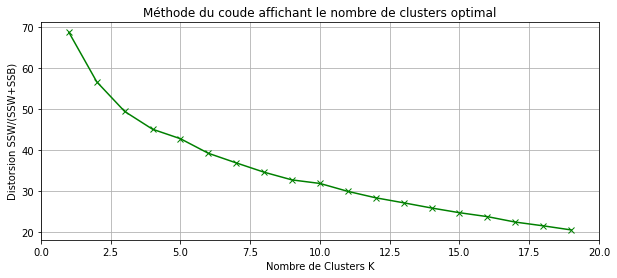

In [17]:
# Visualisation des distorsions en fonction du nombre de clusters
plt.figure(figsize=(10,4))
plt.plot(range_n_clusters, distorsions, 'gx-')
plt.xlabel('Nombre de Clusters K')
plt.ylabel('Distorsion SSW/(SSW+SSB)')
plt.title('Méthode du coude affichant le nombre de clusters optimal')
plt.xlim(0, 20)
plt.grid()
plt.show()

In [18]:
K = 10
kmeans = KMeans(n_clusters = K) 
kmeans.fit(temp)

# Centroids and labels
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

In [19]:
Stations["classes"] = kmeans.labels_.astype(str)

In [20]:
Stations

,Location,Latitude,Longitude,Climat_Koppen,Clim_type_det,Clim_lettre1,0_Mois,0_MinTemp,0_MaxTemp,0_Rainfall,0_Evaporation,0_Sunshine,0_WindGustSpeed,0_WindSpeed9am,0_WindSpeed3pm,0_Humidity9am,0_Humidity3pm,0_Pressure9am,0_Pressure3pm,0_Cloud9am,0_Cloud3pm,0_Temp9am,0_Temp3pm,0_RainToday_Num,1_Mois,1_MinTemp,1_MaxTemp,1_Rainfall,1_Evaporation,1_Sunshine,1_WindGustSpeed,1_WindSpeed9am,1_WindSpeed3pm,1_Humidity9am,1_Humidity3pm,1_Pressure9am,1_Pressure3pm,1_Cloud9am,1_Cloud3pm,1_Temp9am,1_Temp3pm,1_RainToday_Num,2_Mois,2_MinTemp,2_MaxTemp,2_Rainfall,2_Evaporation,2_Sunshine,2_WindGustSpeed,2_WindSpeed9am,2_WindSpeed3pm,2_Humidity9am,2_Humidity3pm,2_Pressure9am,2_Pressure3pm,2_Cloud9am,2_Cloud3pm,2_Temp9am,2_Temp3pm,2_RainToday_Num,3_Mois,3_MinTemp,3_MaxTemp,3_Rainfall,3_Evaporation,3_Sunshine,3_WindGustSpeed,3_WindSpeed9am,3_WindSpeed3pm,3_Humidity9am,3_Humidity3pm,3_Pressure9am,3_Pressure3pm,3_Cloud9am,3_Cloud3pm,3_Temp9am,3_Temp3pm,3_RainToday_Num,4_Mois,4_MinTemp,4_MaxTemp,4_Rainfall,4_Evaporation,4_Sunshine,4_WindGustSpeed,4_WindSpeed9am,4_WindSpeed3pm,4_Humidity9am,4_Humidity3pm,4_Pressure9am,4_Pressure3pm,4_Cloud9am,4_Cloud3pm,4_Temp9am,4_Temp3pm,4_RainToday_Num,5_Mois,5_MinTemp,5_MaxTemp,5_Rainfall,5_Evaporation,5_Sunshine,5_WindGustSpeed,5_WindSpeed9am,5_WindSpeed3pm,5_Humidity9am,5_Humidity3pm,5_Pressure9am,5_Pressure3pm,5_Cloud9am,5_Cloud3pm,5_Temp9am,5_Temp3pm,5_RainToday_Num,6_Mois,6_MinTemp,6_MaxTemp,6_Rainfall,6_Evaporation,6_Sunshine,6_WindGustSpeed,6_WindSpeed9am,6_WindSpeed3pm,6_Humidity9am,6_Humidity3pm,6_Pressure9am,6_Pressure3pm,6_Cloud9am,6_Cloud3pm,6_Temp9am,6_Temp3pm,6_RainToday_Num,7_Mois,7_MinTemp,7_MaxTemp,7_Rainfall,7_Evaporation,7_Sunshine,7_WindGustSpeed,7_WindSpeed9am,7_WindSpeed3pm,7_Humidity9am,7_Humidity3pm,7_Pressure9am,7_Pressure3pm,7_Cloud9am,7_Cloud3pm,7_Temp9am,7_Temp3pm,7_RainToday_Num,8_Mois,8_MinTemp,8_MaxTemp,8_Rainfall,8_Evaporation,8_Sunshine,8_WindGustSpeed,8_WindSpeed9am,8_WindSpeed3pm,8_Humidity9am,8_Humidity3pm,8_Pressure9am,8_Pressure3pm,8_Cloud9am,8_Cloud3pm,8_Temp9am,8_Temp3pm,8_RainToday_Num,9_Mois,9_MinTemp,9_MaxTemp,9_Rainfall,9_Evaporation,9_Sunshine,9_WindGustSpeed,9_WindSpeed9am,9_WindSpeed3pm,9_Humidity9am,9_Humidity3pm,9_Pressure9am,9_Pressure3pm,9_Cloud9am,9_Cloud3pm,9_Temp9am,9_Temp3pm,9_RainToday_Num,10_Mois,10_MinTemp,10_MaxTemp,10_Rainfall,10_Evaporation,10_Sunshine,10_WindGustSpeed,10_WindSpeed9am,10_WindSpeed3pm,10_Humidity9am,10_Humidity3pm,10_Pressure9am,10_Pressure3pm,10_Cloud9am,10_Cloud3pm,10_Temp9am,10_Temp3pm,10_RainToday_Num,11_Mois,11_MinTemp,11_MaxTemp,11_Rainfall,11_Evaporation,11_Sunshine,11_WindGustSpeed,11_WindSpeed9am,11_WindSpeed3pm,11_Humidity9am,11_Humidity3pm,11_Pressure9am,11_Pressure3pm,11_Cloud9am,11_Cloud3pm,11_Temp9am,11_Temp3pm,11_RainToday_Num,classes
0,Adelaide,-34.916897,138.598531,Csa,Méditerranéen/été chaud,Tempéré,1.0,18.062007,30.954122,0.764158,10.291541,10.688817,38.931900,9.935484,16.394265,47.292115,32.326165,1013.725448,1011.949104,2.939068,3.157706,23.030645,29.318280,0.096774,2.0,17.835841,30.053540,1.061504,8.815841,9.738496,37.232301,8.805310,15.765487,51.685841,35.411504,1015.583186,1013.938938,3.128319,3.132743,22.136283,28.417257,0.075221,3.0,15.954480,27.105735,1.182079,6.563441,8.578351,35.130824,8.028674,15.032258,59.340502,40.311828,1017.920430,1016.204839,3.483871,3.544803,19.443728,25.665591,0.132616,4.0,12.934167,23.317083,1.429583,5.028250,7.611583,32.512500,8.441667,13.993750,58.779167,43.902083,1021.398750,1018.990000,3.570833,3.745833,17.795000,22.118542,0.179167,5.0,10.739427,19.183513,2.226165,2.722366,5.879211,31.519713,8.035842,12.598566,68.146953,53.745520,1021.917921,1019.710394,4.247312,4.494624,14.591398,18.140323,0.275986,6.0,8.160755,16.241509,2.228302,2.054038,5.493057,31.945317,7.622642,13.411321,76.475472,59.124528,1022.730755,1020.743019,4.569811,4.747170,11.473962,15.292453,0.294340,7.0,7.877617,15.379783,2.896390,2.016390,5.141733,36.148014,9.750903,15.191336,75.545126,59.458484,1021.814801,101

In [21]:
Stations['Climat_Koppen_1L']=Stations['Climat_Koppen'].str[0]

In [23]:
crosstab = pd.crosstab(Stations['Climat_Koppen_1L'], Stations['classes'])
crosstab
#stats.chi2_contingency(crosstab)

classes,0,1,2,3,4,5,6,7,8,9
Climat_Koppen_1L,,,,,,,,,,
A,0,0,0,0,0,0,4,0,0,0
B,0,0,3,0,0,0,0,3,2,0
C,4,7,5,5,3,7,0,0,5,1


crosstab = pd.crosstab(Stations['Clim_type_det'], Stations['classes'])
crosstab
#stats.chi2_contingency(crosstab)

In [24]:
# Réaffectation des labels des clusters pour matcher avec l'échelle des couleurs de la première carte
clim_reaff = {
    '0' : '04',
    '1' : '05',
    '2' : '01',
    '3' : '06',
    '4' : '07',
    '5' : '08',
    '6' : '00',
    '7' : '02',
    '8' : '03',
    '9' : '09'
}

Stations["classes_ord"]=Stations['classes'].map(clim_reaff)

In [25]:
Stations.head()

,Location,Latitude,Longitude,Climat_Koppen,Clim_type_det,Clim_lettre1,0_Mois,0_MinTemp,0_MaxTemp,0_Rainfall,0_Evaporation,0_Sunshine,0_WindGustSpeed,0_WindSpeed9am,0_WindSpeed3pm,0_Humidity9am,0_Humidity3pm,0_Pressure9am,0_Pressure3pm,0_Cloud9am,0_Cloud3pm,0_Temp9am,0_Temp3pm,0_RainToday_Num,1_Mois,1_MinTemp,1_MaxTemp,1_Rainfall,1_Evaporation,1_Sunshine,1_WindGustSpeed,1_WindSpeed9am,1_WindSpeed3pm,1_Humidity9am,1_Humidity3pm,1_Pressure9am,1_Pressure3pm,1_Cloud9am,1_Cloud3pm,1_Temp9am,1_Temp3pm,1_RainToday_Num,2_Mois,2_MinTemp,2_MaxTemp,2_Rainfall,2_Evaporation,2_Sunshine,2_WindGustSpeed,2_WindSpeed9am,2_WindSpeed3pm,2_Humidity9am,2_Humidity3pm,2_Pressure9am,2_Pressure3pm,2_Cloud9am,2_Cloud3pm,2_Temp9am,2_Temp3pm,2_RainToday_Num,3_Mois,3_MinTemp,3_MaxTemp,3_Rainfall,3_Evaporation,3_Sunshine,3_WindGustSpeed,3_WindSpeed9am,3_WindSpeed3pm,3_Humidity9am,3_Humidity3pm,3_Pressure9am,3_Pressure3pm,3_Cloud9am,3_Cloud3pm,3_Temp9am,3_Temp3pm,3_RainToday_Num,4_Mois,4_MinTemp,4_MaxTemp,4_Rainfall,4_Evaporation,4_Sunshine,4_WindGustSpeed,4_WindSpeed9am,4_WindSpeed3pm,4_Humidity9am,4_Humidity3pm,4_Pressure9am,4_Pressure3pm,4_Cloud9am,4_Cloud3pm,4_Temp9am,4_Temp3pm,4_RainToday_Num,5_Mois,5_MinTemp,5_MaxTemp,5_Rainfall,5_Evaporation,5_Sunshine,5_WindGustSpeed,5_WindSpeed9am,5_WindSpeed3pm,5_Humidity9am,5_Humidity3pm,5_Pressure9am,5_Pressure3pm,5_Cloud9am,5_Cloud3pm,5_Temp9am,5_Temp3pm,5_RainToday_Num,6_Mois,6_MinTemp,6_MaxTemp,6_Rainfall,6_Evaporation,6_Sunshine,6_WindGustSpeed,6_WindSpeed9am,6_WindSpeed3pm,6_Humidity9am,6_Humidity3pm,6_Pressure9am,6_Pressure3pm,6_Cloud9am,6_Cloud3pm,6_Temp9am,6_Temp3pm,6_RainToday_Num,7_Mois,7_MinTemp,7_MaxTemp,7_Rainfall,7_Evaporation,7_Sunshine,7_WindGustSpeed,7_WindSpeed9am,7_WindSpeed3pm,7_Humidity9am,7_Humidity3pm,7_Pressure9am,7_Pressure3pm,7_Cloud9am,7_Cloud3pm,7_Temp9am,7_Temp3pm,7_RainToday_Num,8_Mois,8_MinTemp,8_MaxTemp,8_Rainfall,8_Evaporation,8_Sunshine,8_WindGustSpeed,8_WindSpeed9am,8_WindSpeed3pm,8_Humidity9am,8_Humidity3pm,8_Pressure9am,8_Pressure3pm,8_Cloud9am,8_Cloud3pm,8_Temp9am,8_Temp3pm,8_RainToday_Num,9_Mois,9_MinTemp,9_MaxTemp,9_Rainfall,9_Evaporation,9_Sunshine,9_WindGustSpeed,9_WindSpeed9am,9_WindSpeed3pm,9_Humidity9am,9_Humidity3pm,9_Pressure9am,9_Pressure3pm,9_Cloud9am,9_Cloud3pm,9_Temp9am,9_Temp3pm,9_RainToday_Num,10_Mois,10_MinTemp,10_MaxTemp,10_Rainfall,10_Evaporation,10_Sunshine,10_WindGustSpeed,10_WindSpeed9am,10_WindSpeed3pm,10_Humidity9am,10_Humidity3pm,10_Pressure9am,10_Pressure3pm,10_Cloud9am,10_Cloud3pm,10_Temp9am,10_Temp3pm,10_RainToday_Num,11_Mois,11_MinTemp,11_MaxTemp,11_Rainfall,11_Evaporation,11_Sunshine,11_WindGustSpeed,11_WindSpeed9am,11_WindSpeed3pm,11_Humidity9am,11_Humidity3pm,11_Pressure9am,11_Pressure3pm,11_Cloud9am,11_Cloud3pm,11_Temp9am,11_Temp3pm,11_RainToday_Num,classes,Climat_Koppen_1L,classes_ord
0,Adelaide,-34.916897,138.598531,Csa,Méditerranéen/été chaud,Tempéré,1.0,18.062007,30.954122,0.764158,10.291541,10.688817,38.931900,9.935484,16.394265,47.292115,32.326165,1013.725448,1011.949104,2.939068,3.157706,23.030645,29.318280,0.096774,2.0,17.835841,30.053540,1.061504,8.815841,9.738496,37.232301,8.805310,15.765487,51.685841,35.411504,1015.583186,1013.938938,3.128319,3.132743,22.136283,28.417257,0.075221,3.0,15.954480,27.105735,1.182079,6.563441,8.578351,35.130824,8.028674,15.032258,59.340502,40.311828,1017.920430,1016.204839,3.483871,3.544803,19.443728,25.665591,0.132616,4.0,12.934167,23.317083,1.429583,5.028250,7.611583,32.512500,8.441667,13.993750,58.779167,43.902083,1021.398750,1018.990000,3.570833,3.745833,17.795000,22.118542,0.179167,5.0,10.739427,19.183513,2.226165,2.722366,5.879211,31.519713,8.035842,12.598566,68.146953,53.745520,1021.917921,1019.710394,4.247312,4.494624,14.591398,18.140323,0.275986,6.0,8.160755,16.241509,2.228302,2.054038,5.493057,31.945317,7.622642,13.411321,76.475472,59.124528,1022.730755,1020.743019,4.569811,4.747170,11.473962,15.292453,0.294340,7.0,7.877617,15.379783,2.896390,2.016390,5.141733,36.148014,9.750903,15.191336,75.545

crosstab = pd.crosstab(Stations['Clim_type_det'], Stations['classes_ord'])
crosstab
#stats.chi2_contingency(crosstab)

In [26]:
Contour_Aus = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
Contour_Aus = Contour_Aus[Contour_Aus["name"] == "Australia"]

geometry = [Point(xy) for xy in zip(Stations['Longitude'], Stations['Latitude'])]
geo_df = gpd.GeoDataFrame(Stations, geometry=geometry)

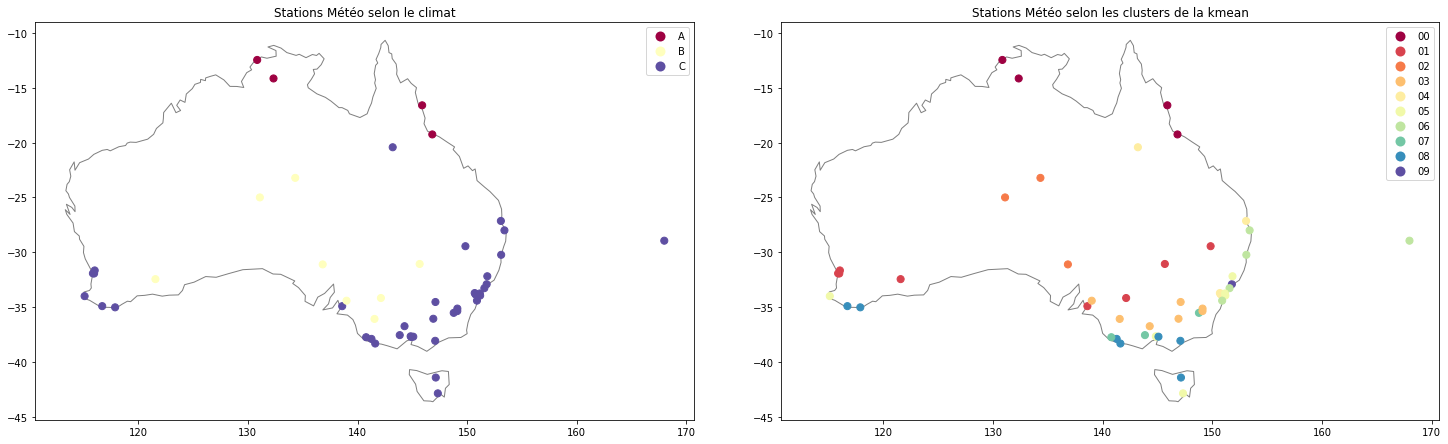

In [27]:
Contour_Aus = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
Contour_Aus = Contour_Aus[Contour_Aus["name"] == "Australia"]

fig = plt.figure(constrained_layout=True, figsize=(20, 8))
subfigs = fig.subfigures(1, 2, wspace=0.07)

ax=subfigs[0].subplots(1, 1)
Contour_Aus.plot(ax=ax,color="None",edgecolor="Grey")  
ax.title.set_text('Stations Météo selon le climat')
geo_df.plot(ax=ax,markersize=50, cmap='Spectral', column="Climat_Koppen_1L",legend=True);

ax1=subfigs[1].subplots(1, 1)
Contour_Aus.plot(ax=ax1,color="None",edgecolor="Grey")  
ax1.title.set_text('Stations Météo selon les clusters de la kmean')
geo_df.plot(ax=ax1,markersize=50, cmap='Spectral', column="classes_ord",legend=True);

In [28]:
Stations[["Location","classes","classes_ord"]].to_csv("kmeans_1L.csv")

Stations[["Location","Climat_Koppen","Clim_type","Clim_type_det","classes","classes_ord"]]